In [1]:
import cv2
video_path = 'test_video.mp4'
video = cv2.VideoCapture(video_path)

frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Total number of frames: {frame_count}")

video.release()


Total number of frames: 1295


In [2]:
video_path = 'test_video.mp4'
video = cv2.VideoCapture(video_path)
for i in range(5):
    ret, frame = video.read()
    if not ret:
        print("Failed to grab frame.")
        break
    cv2.imshow(f'Frame {i+1}', frame)
    
    cv2.waitKey(0)

## Gaussian blur

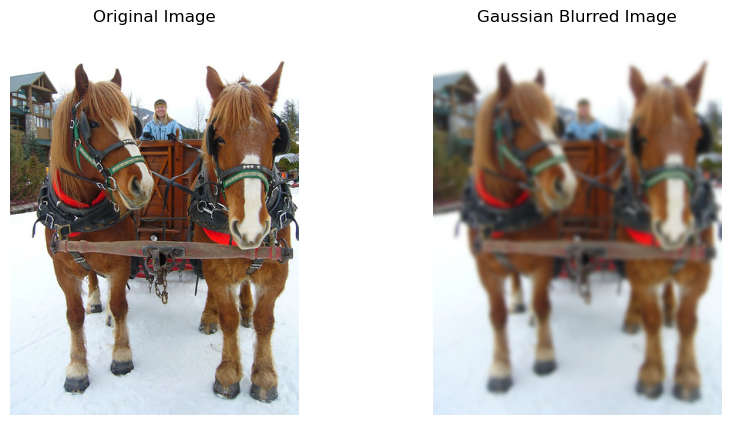

In [3]:
import matplotlib.pyplot as plt
def apply_gaussian_blur(img, kernel_size=(15, 15), sigma=0):
    return cv2.GaussianBlur(img, kernel_size, sigma)

image_path = r"C:\Users\aryan\Projects\Caption Generation\Flickr8k_Dataset\109202801_c6381eef15.jpg"
img = cv2.imread(image_path)

blurred_img = apply_gaussian_blur(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()


In [4]:
def apply_gaussian_blur(frame, kernel_size=(15, 15), sigma=0):
    return cv2.GaussianBlur(frame, kernel_size, sigma)

video_path = 'test_video.mp4' 
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()
while True:
    ret, frame = cap.read()
    
    if not ret:
        break  
    blurred_frame = apply_gaussian_blur(frame)

    combined_frame = cv2.hconcat([frame, blurred_frame])
    cv2.imshow('Original and Gaussian Blurred Frame', combined_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Grayscale

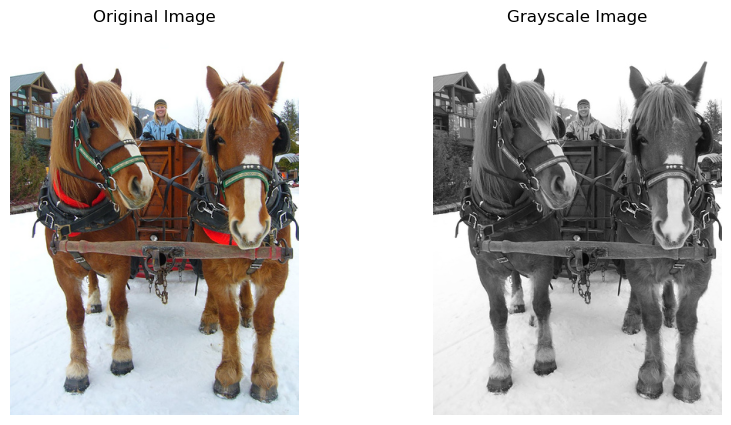

In [5]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image_path = r"C:\Users\aryan\Projects\Caption Generation\Flickr8k_Dataset\109202801_c6381eef15.jpg"
img = cv2.imread(image_path)

gray_img = grayscale(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


In [6]:
def apply_grayscale(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

video_path = 'test_video.mp4'  
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        break  

    gray_frame = apply_grayscale(frame)

    combined_frame = cv2.hconcat([frame, cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR)])
    cv2.imshow('Original and Grayscale Frame', combined_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Canny Edge

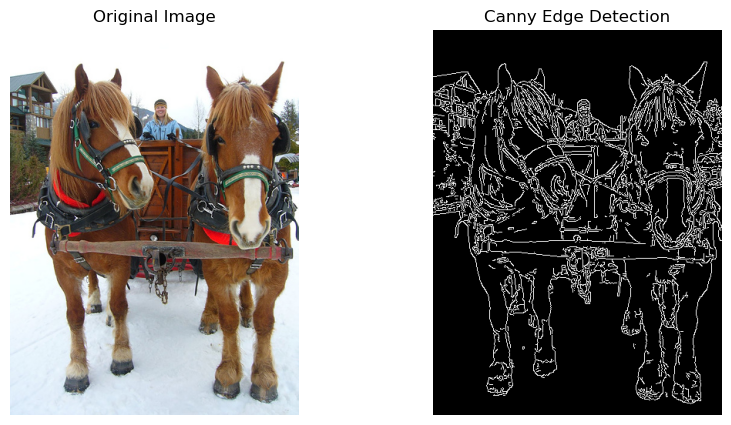

In [7]:
def apply_canny_edge_detection(img, lower_threshold=100, upper_threshold=200):
    return cv2.Canny(img, lower_threshold, upper_threshold)

image_path = r"C:\Users\aryan\Projects\Caption Generation\Flickr8k_Dataset\109202801_c6381eef15.jpg"
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = apply_canny_edge_detection(gray_img)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

In [8]:
def apply_canny_edge(frame, low_threshold=50, high_threshold=150):
    return cv2.Canny(frame, low_threshold, high_threshold)
video_path = 'test_video.mp4' 
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        break 

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    edges_frame = apply_canny_edge(gray_frame)

    combined_frame = cv2.hconcat([frame, cv2.cvtColor(edges_frame, cv2.COLOR_GRAY2BGR)])
    cv2.imshow('Original and Canny Edge Frame', combined_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Isolating Region of Interest

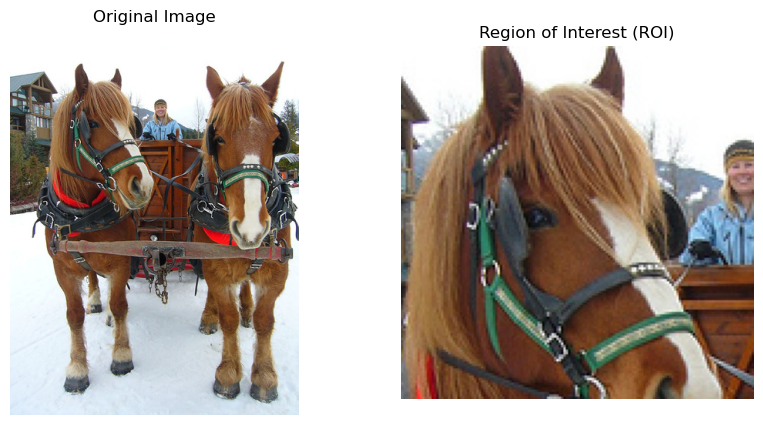

In [9]:
def extract_roi(img, top_left, bottom_right):
    x1, y1 = top_left
    x2, y2 = bottom_right
    return img[y1:y2, x1:x2]

image_path = r"C:\Users\aryan\Projects\Caption Generation\Flickr8k_Dataset\109202801_c6381eef15.jpg"
img = cv2.imread(image_path)

top_left = (50, 50)        
bottom_right = (200, 200)  

roi = extract_roi(img, top_left, bottom_right)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Region of Interest (ROI)')
plt.axis('off')

plt.show()

In [10]:
import numpy as np

def apply_roi(frame, vertices):
  
    mask = np.zeros_like(frame)
    
    cv2.fillPoly(mask, vertices, 255)
    
    masked_frame = cv2.bitwise_and(frame, mask)
    return masked_frame

def region_of_interest_vertices(image):
    height, width = image.shape[:2]
    vertices = [
        (0, height),
        (width // 2, height // 2),
        (width, height)
    ]
    return np.array([vertices], dtype=np.int32)

video_path = 'test_video.mp4'  
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        break  
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    vertices = region_of_interest_vertices(gray_frame)

    
    roi_frame = apply_roi(gray_frame, vertices)

    combined_frame = cv2.hconcat([frame, cv2.cvtColor(roi_frame, cv2.COLOR_GRAY2BGR)])
    cv2.imshow('Original and ROI Frame', combined_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Draw lines

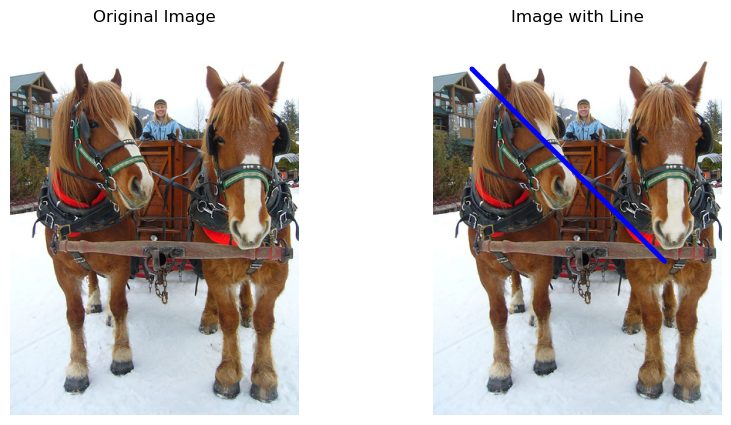

In [11]:
def draw_line(img, start_point, end_point, color=(255, 0, 0), thickness=5):
    return cv2.line(img, start_point, end_point, color, thickness)

image_path = r"C:\Users\aryan\Projects\Caption Generation\Flickr8k_Dataset\109202801_c6381eef15.jpg"
img = cv2.imread(image_path)
start_point = (50, 50)   
end_point = (300, 300)   
line_color = (255, 0, 0)  
line_thickness = 5        

img_with_line = draw_line(img, start_point, end_point, line_color, line_thickness)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_line, cv2.COLOR_BGR2RGB))
plt.title('Image with Line')
plt.axis('off')

plt.show()

In [12]:
def draw_lines(frame, lines, color=[0, 255, 0], thickness=5):
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(frame, (x1, y1), (x2, y2), color, thickness)
    return frame


def hough_lines(frame, rho=1, theta=np.pi/180, threshold=50, min_line_len=100, max_line_gap=50):
    # Apply Canny edge detection
    edges = cv2.Canny(frame, 50, 150)
    
    # Apply Hough Transform to detect lines
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines

video_path = 'test_video.mp4' 
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        break  
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    lines = hough_lines(gray_frame)

    line_frame = draw_lines(frame, lines)

    cv2.imshow('Frame with Lines', line_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Hough Transform

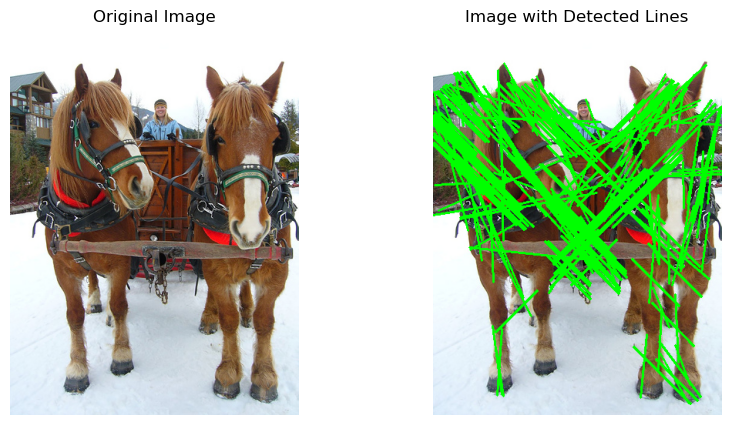

In [13]:
def detect_lines(img, rho=1, theta=np.pi/180, threshold=100):
 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=50, maxLineGap=10)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return img

image_path = r"C:\Users\aryan\Projects\Caption Generation\Flickr8k_Dataset\109202801_c6381eef15.jpg"
img = cv2.imread(image_path)

img_with_lines = detect_lines(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Lines')
plt.axis('off')

plt.show()

In [14]:
def canny_edge_detection(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def detect_lines(frame):
    edges = canny_edge_detection(frame)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return frame

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_with_lines = detect_lines(frame)

        cv2.imshow('Video with Line Detection', frame_with_lines)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

video_path = 'test_video.mp4'
process_video(video_path)
